# MFoCS Dissertation Project: Louvain and Leiden 

Candidate Number 1057137, Linacre College, Trinity Term 2022.
<br/><br/>
Note that we used version 0.9.0 of LeidenAlg, which was released on Oct 3, 2022.
https://github.com/vtraag/leidenalg

## Preamble

### Packages

In [ ]:
# Some functions work better with graphs in igraph format and some in networkx format
# Note: The Leiden algorithm is exposed to python via the igraph package  
import igraph as ig
import leidenalg as la

import networkx as nx
import networkx.algorithms.community as nx_comm
import numpy as np

import math
import importlib

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
import copy as copy

import time
import pandas as pd
import statistics
import itertools

import seaborn as sns

import matplotlib as mpl
from matplotlib import cm



import mplcyberpunk

### Reading Graphs into python

In [ ]:
# Reading real-world graphs with ground-truth into igraph

G_Football = ig.Graph.Read_GraphML('/Users/lewishome/Ground_truth_sample_graphs/graph_ml_format/football_graph.graphml')
G_Eu = ig.Graph.Read_GraphML('/Users/lewishome/Ground_truth_sample_graphs/graph_ml_format/eu_graph.graphml')
G_Fb = ig.Graph.Read_GraphML('/Users/lewishome/Ground_truth_sample_graphs/graph_ml_format/fb_ego_user_1684_graph.graphml')

G_Pol_Books = ig.Graph.Read_GraphML('/Users/lewishome/Ground_truth_sample_graphs/graph_ml_format/pol_books_graph.graphml')
G_Pol_Blogs = ig.Graph.Read_GraphML('/Users/lewishome/Ground_truth_sample_graphs/graph_ml_format/pol_blogs_graph.graphml')
G_Karate = ig.Graph.Read_GraphML('/Users/lewishome/Ground_truth_sample_graphs/graph_ml_format/karate_club_graph.graphml')

# Reading real-world graphs with ground-truth into networkx

G_Eu_nx = nx.read_gexf('/Users/lewishome/Ground_truth_sample_graphs/gexf_format/eu_email_graph.gexf')
G_Football_nx = nx.read_gexf('/Users/lewishome/Ground_truth_sample_graphs/gexf_format/football_graph.gexf')
G_Fb_nx = nx.read_gexf('/Users/lewishome/Ground_truth_sample_graphs/gexf_format/fb_ego_user_1684_graph.gexf')

G_Pol_Books_nx = nx.read_gexf('/Users/lewishome/Ground_truth_sample_graphs/gexf_format/polbooks_graph.gexf')
G_Pol_Blogs_nx = nx.read_gexf('/Users/lewishome/Ground_truth_sample_graphs/gexf_format/polblogs_graph.gexf')
G_Karate_nx = nx.read_gexf('/Users/lewishome/Ground_truth_sample_graphs/gexf_format/karate_club_graph.gexf')

In [5]:
# These are larger networks without ground-truth

# Relativity Collab network

G_Col_Rel_nx = nx.read_adjlist('/Users/lewishome/Ground_truth_sample_graphs/SNAP_Networks/Collab_Relativity.txt')
G_Col_Rel = ig.Graph.from_networkx(G_Col_Rel_nx)


# Oxford Birds

G_Birds_nx = nx.read_adjlist('/Users/lewishome/Ground_truth_sample_graphs/edges_format/aves-wildbird-network/aves-wildbird-network.edges')
G_Birds = ig.Graph.from_networkx(G_Birds_nx)

# Fly Optical Lobe


G_Brain_nx = nx.read_adjlist('/Users/lewishome/Ground_truth_sample_graphs/edges_format/bn-fly-drosophila_medulla_1/bn-fly-drosophila_medulla_1.edges')
G_Brain = ig.Graph.from_networkx(G_Brain_nx)


G_Col_Theory_nx = nx.read_adjlist('/Users/lewishome/Ground_truth_sample_graphs/SNAP_Networks/Collab_Physics_Theory.txt')
G_Col_Theory = ig.Graph.from_networkx(G_Col_Theory_nx)

# For 1 additional network. Dropped because its too large and breaks my kernel


# G_Col_Cond_nx = nx.read_adjlist('/Users/lewishome/Ground_truth_sample_graphs/SNAP_Networks/Collab_Cond_Matter.txt')
# G_Col_Cond = ig.Graph.from_networkx(G_Col_Cond_nx)

In [6]:
## Easy way to calculate empirical network stats for table

from sigfig import round

def nth_moment(G_nx, n):
    s = 0
    for node in G_nx.nodes:
        s += G_nx.degree[node] ** n
    return (s/len(G_nx))


def gen_networks_stats(G_nx):
    print('Number of Nodes =' , nx.number_of_nodes(G_nx))
    print('Number of Edges =' , nx.number_of_edges(G_nx))
    print('1st moment of degree =' , round(nth_moment(G_nx, 1),sigfigs=5))
    print('2nd moment of degree' , round(nth_moment(G_nx,2), sigfigs=5))
    print('Avg Clus. Coef.=' , round(nx.average_clustering(G_nx), sigfigs=5))
    print('Diameter =' , nx.diameter(G_nx))

gen_networks_stats(G_Karate_nx)

# How to make Diameter Work For Networks which are not connected 

# largest_cc = max(nx.connected_components(G_Col_Rel_nx), key=len)

# S = [G_Col_Rel_nx.subgraph(c).copy() for c in nx.connected_components(G_Col_Rel_nx)]
# for subgraph in S:
#     print(nx.diameter(subgraph))

Number of Nodes = 34
Number of Edges = 78
1st moment of degree = 4.5882
2nd moment of degree 35.647
Avg Clus. Coef.= 0.57064
Diameter = 5


In [ ]:
## Easy way to calculate empirical network stats for table

from sigfig import round

def nth_moment(G_nx, n):
    s = 0
    for node in G_nx.nodes:
        s += G_nx.degree[node] ** n
    return (s/len(G_nx))


# How to make Diameter Work For Networks which are not connected 
# Fresh on 22 Dec

largest_cc = max(nx.connected_components(G_Col_Rel_nx), key=len)

S = [G_Col_Rel_nx.subgraph(c).copy() for c in nx.connected_components(G_Col_Rel_nx)]
diam_list = []
for subgraph in S:
    diam_list.append(nx.diameter(subgraph))
try:
    print(max(diam_list))
finally:


def gen_networks_stats(G_nx):
    print('Number of Nodes =' , nx.number_of_nodes(G_nx))
    print('Number of Edges =' , nx.number_of_edges(G_nx))
    print('1st moment of degree =' , round(nth_moment(G_nx, 1),sigfigs=5))
    print('2nd moment of degree' , round(nth_moment(G_nx,2), sigfigs=5))
    print('Avg Clus. Coef.=' , round(nx.average_clustering(G_nx), sigfigs=5))
    print('Diameter =' , nx.diameter(G_nx))

gen_networks_stats(G_Karate_nx)



## Defining Functions

### Louvain and Leiden Functions

In [7]:
#Writing a function which puts all louvain partitions into one list

def louvain(Graph):
    optimiser = la.Optimiser()
    all_partitions_to_have_existed = []

    partition = la.ModularityVertexPartition(Graph)
    all_partitions_to_have_existed.append(copy.deepcopy(partition))

    partition_agg = partition.aggregate_partition()
    
    while optimiser.move_nodes(partition_agg) > 0:
        partition.from_coarse_partition(partition_agg)
        partition_agg = partition_agg.aggregate_partition()
        all_partitions_to_have_existed.append(copy.deepcopy(partition))

    return all_partitions_to_have_existed   



In [8]:
# Writing a function which puts all leiden partitions into one list
def leiden(Graph):
    optimiser = la.Optimiser()
    all_partitions_to_have_existed = []

    # Set initial partition
    partition = la.ModularityVertexPartition(Graph)
    all_partitions_to_have_existed.append(copy.deepcopy(partition))
    refined_partition = la.ModularityVertexPartition(Graph)
    partition_agg = refined_partition.aggregate_partition()

    while optimiser.move_nodes(partition_agg):

        # Get individual membership for partition
        partition.from_coarse_partition(partition_agg, refined_partition.membership)
        all_partitions_to_have_existed.append(copy.deepcopy(partition))

        # Refine partition
        refined_partition = la.ModularityVertexPartition(Graph)
        optimiser.merge_nodes_constrained(refined_partition, partition)

        # Define aggregate partition on refined partition
        partition_agg = refined_partition.aggregate_partition()

        # But use membership of actual partition
        aggregate_membership = [None] * len(refined_partition)
        for i in range(Graph.vcount()):
            aggregate_membership[refined_partition.membership[i]] = partition.membership[i]
        
        partition_agg.set_membership(aggregate_membership)
        
    return all_partitions_to_have_existed

In [9]:
# Writing a function which calculates the Modularity of each partition in a list

def calc_modularity_list(partition):
    mod_list = []
    for i in range(len(partition)):
        mod = partition[i].quality()
        mod_list.append(copy.deepcopy(mod))
    return mod_list

In [10]:
# Function which converts louvain and leiden output partition format into networkx partition dictionary format

def partition_to_dict(partition_list, nxGraph, clustering_label):
    d = {}
    complex_list = nx.get_node_attributes(nxGraph, clustering_label)
    keys = list(complex_list.values())
    
    for i in complex_list.values():
        d[i] = -1
    
    for i in range(len(partition_list)):
        for j in range(len(partition_list[i])):
            #assert(keys[partition_list[i][j]] in d)
            d[keys[partition_list[i][j]]] = i
    return d

### For Recording Average Computation time.
This requires us to vary the algorithm so that the partitions at each pass are not stored separately as in the algorithms louvain() and leiden() above. For the analysis we need to store each partition separately, but this slows down the algorithms.

That's why these functions use louvain_pure() and leiden_pure(), which are written exactly as decribed in the documentation for the LeidenAlg package (see https://leidenalg.readthedocs.io/en/stable/advanced.html). 

Note that this means these are technically the computation times of a different sample from above, but you can't do both things at once because when the partitions are updated in the pure algorithm, old ones are lost.

In [11]:
#Writing a pure Louvain function

def louvain_pure(Graph):
    optimiser = la.Optimiser()
    partition = la.ModularityVertexPartition(Graph)
    partition_agg = partition.aggregate_partition()
    while optimiser.move_nodes(partition_agg) > 0:
        partition.from_coarse_partition(partition_agg)
        partition_agg = partition_agg.aggregate_partition()   

# Writing a pure Leiden function
def leiden_pure(Graph):
    optimiser = la.Optimiser()
    # Set initial partition
    partition = la.ModularityVertexPartition(Graph)
    refined_partition = la.ModularityVertexPartition(Graph)
    partition_agg = refined_partition.aggregate_partition()

    while optimiser.move_nodes(partition_agg):

        # Get individual membership for partition
        partition.from_coarse_partition(partition_agg, refined_partition.membership)

        # Refine partition
        refined_partition = la.ModularityVertexPartition(Graph)
        optimiser.merge_nodes_constrained(refined_partition, partition)

        # Define aggregate partition on refined partition
        partition_agg = refined_partition.aggregate_partition()

        # But use membership of actual partition
        aggregate_membership = [None] * len(refined_partition)
        for i in range(Graph.vcount()):
            aggregate_membership[refined_partition.membership[i]] = partition.membership[i]
        
        partition_agg.set_membership(aggregate_membership)
    

In [12]:
## Function which runs each algorithm n times on a network

def generate_sample_time(G_igraph, number_of_its, network_name):

    Louvain_time = []
    Leiden_time = []

    for i in range(number_of_its):
        
        Louvain_start = time.time_ns()
        louvain_pure(G_igraph)
        Louvain_end =time.time_ns()

        Louvain_time.append(copy.deepcopy((Louvain_end - Louvain_start ) / (10 ** 9) ))
        
        Leiden_start = time.time_ns()
        leiden_pure(G_igraph) 
        Leiden_end = time.time_ns()
        Leiden_time.append(copy.deepcopy((Leiden_end - Leiden_start)/ (10 ** 9) ))

    
    Louvain_time_mean = statistics.mean(Louvain_time)
    Louvain_time_std = statistics.stdev(Louvain_time)
    Leiden_time_mean = statistics.mean(Leiden_time)
    Leiden_time_std = statistics.stdev(Leiden_time)

    times_data = quick_df(network_name, Louvain_time_mean, Louvain_time_std, Leiden_time_mean, Leiden_time_std)

    print(times_data)
    
    return times_data


### External Evaluation Indices

In [13]:
# Writing ARI generating function

def ARI(G, clustering, clustering_label="club"):
    """
    Compute the Adjust Rand Index (clustering accuracy) of "clustering" with "clustering_label" as ground truth.

    Parameters
    ----------
    G : NetworkX graph
        A given NetworkX graph with node attribute "clustering_label" as ground truth.
    clustering : dict or list or list of set
        Predicted community clustering.
    clustering_label : str
        Node attribute name for ground truth.

    Returns
    -------
    ari : float
        Adjust Rand Index for predicted community.
    """

    complex_list = nx.get_node_attributes(G, clustering_label)

    le = preprocessing.LabelEncoder()
    y_true = le.fit_transform(list(complex_list.values()))

    if isinstance(clustering, dict):
        # python-louvain partition format
        y_pred = np.array([str(clustering[v]) for v in complex_list.values()])
    elif isinstance(clustering[0], set):
        # networkx partition format
        predict_dict = {c: idx for idx, comp in enumerate(clustering) for c in comp}
        y_pred = np.array([predict_dict[v] for v in complex_list.values()])
    elif isinstance(clustering, list):
        # sklearn partition format
        y_pred = clustering
    else:
        return -1
       
    y_pred = le.fit_transform(list(y_pred))
    #print(y_true, y_pred) 
    return metrics.adjusted_rand_score(y_true, y_pred)

# Inspired by Ni in https://graphriccicurvature.readthedocs.io/en/v0.5.1/tutorial.html

In [14]:
# Writing Fowlkes-Mallows generating function

def Fowlkes(G, clustering, clustering_label="club"):
    """
    Compute the Fowlkes-Mallows index (clustering accuracy) of "clustering" with "clustering_label" as ground truth.

    Parameters
    ----------
    G : NetworkX graph
        A given NetworkX graph with node attribute "clustering_label" as ground truth.
    clustering : dict or list or list of set
        Predicted community clustering.
    clustering_label : str
        Node attribute name for ground truth.

    Returns
    -------
    Fowlkes-Mallows Index : float
       Fowlkes-Mallows for predicted community.
    """

    complex_list = nx.get_node_attributes(G, clustering_label)

    le = preprocessing.LabelEncoder()
    y_true = le.fit_transform(list(complex_list.values()))

    if isinstance(clustering, dict):
        # python-louvain partition format
        y_pred = np.array([str(clustering[v]) for v in complex_list.values()])
    elif isinstance(clustering[0], set):
        # networkx partition format
        predict_dict = {c: idx for idx, comp in enumerate(clustering) for c in comp}
        y_pred = np.array([predict_dict[v] for v in complex_list.values()])
    elif isinstance(clustering, list):
        # sklearn partition format
        y_pred = clustering
    else:
        return -1
       
    y_pred = le.fit_transform(list(y_pred))
    #print(y_true, y_pred) 
    return metrics.fowlkes_mallows_score(y_true, y_pred)

In [15]:
# Writing NMI generating function

def NMI(G, clustering, clustering_label="club"):
    """
    Compute the Normalised Mututal Index (clustering accuracy) of "clustering" with "clustering_label" as ground truth.

    Parameters
    ----------
    G : NetworkX graph
        A given NetworkX graph with node attribute "clustering_label" as ground truth.
    clustering : dict or list or list of set
        Predicted community clustering.
    clustering_label : str
        Node attribute name for ground truth.

    Returns
    -------
    NMI : float
        Normalised Mutual Information for predicted community.
    """

    complex_list = nx.get_node_attributes(G, clustering_label)

    le = preprocessing.LabelEncoder()
    y_true = le.fit_transform(list(complex_list.values()))

    if isinstance(clustering, dict):
        # python-louvain partition format
        y_pred = np.array([str(clustering[v]) for v in complex_list.values()])
    elif isinstance(clustering[0], set):
        # networkx partition format
        predict_dict = {c: idx for idx, comp in enumerate(clustering) for c in comp}
        y_pred = np.array([predict_dict[v] for v in complex_list.values()])
    elif isinstance(clustering, list):
        # sklearn partition format
        y_pred = clustering
    else:
        return -1
       
    y_pred = le.fit_transform(list(y_pred))
    #print(y_true, y_pred) 
    return metrics.normalized_mutual_info_score(y_true, y_pred)

In [16]:
# Function which calculates the fowlkes for each partition in a list

def calc_Fowlkes_list(partition_list, nxGraph, clustering_label):
    Fowlkes_list = []
    for i in range(len(partition_list)):
        each_Fowlkes = Fowlkes(nxGraph, partition_to_dict(partition_list[i], nxGraph, clustering_label), clustering_label)
        Fowlkes_list.append(copy.deepcopy(each_Fowlkes))
    return Fowlkes_list

In [17]:
# Function which calculates the NMI for each partition in a list

def calc_NMI_list(partition_list, nxGraph, clustering_label):
    NMI_list = []
    for i in range(len(partition_list)):
        each_NMI = NMI(nxGraph, partition_to_dict(partition_list[i], nxGraph, clustering_label), clustering_label)
        NMI_list.append(copy.deepcopy(each_NMI))
    return NMI_list

In [18]:
# Function which calculates the ARI of each partition in a list

def calc_ARI_list(partition_list, nxGraph, clustering_label):
    ARI_list = []
    for i in range(len(partition_list)):
        each_ARI = ARI(nxGraph, partition_to_dict(partition_list[i], nxGraph, clustering_label), clustering_label)
        ARI_list.append(copy.deepcopy(each_ARI))
    return ARI_list

### Functions which generate large samples of Louvain and Leiden run on the same network 

Also includes functions which take averages and standard deviations of each measure

In [19]:
def column_wise_sum(rows):
    columns = itertools.zip_longest(*rows, fillvalue=0)
    return [sum(col)/len(rows) for col in columns]     

In [20]:
# Function which allows us to take a large sample of Louvain and Leiden partitions and records modularity, ARI, Fowlkes and NMI

def generate_sample(number_of_its, G_igraph, G_nx, clustering_label):
    
    Louvain_mod_list = []
    Leiden_mod_list = []

    Louvain_ARI_list = []
    Leiden_ARI_list = []
    Louvain_Fowlkes_list = []
    Leiden_Fowlkes_list = []
    Louvain_NMI_list = []
    Leiden_NMI_list = []

    Louvain_time = []
    Leiden_time = []

    G_Louvain_no_of_communities = []
    G_Leiden_no_of_communities = []

    G_Louvain_avg_community_sizes = []
    G_Leiden_avg_community_sizes = []

    for i in range(number_of_its):

        # Note that this time is biased because we arew deep copying every partition. 
        # Therefore, we use a separate function to calculate the time for our figures
        # This time measurement should just be considereds as a helpful but rough guideline
        
        Louvain_start = time.time()
        G_Louvain_partitions_list = louvain(G_igraph)
        Louvain_end = time.time()
        Louvain_time.append(copy.deepcopy(Louvain_end - Louvain_start))
        
        Leiden_start = time.time()
        G_Leiden_partitions_list = leiden(G_igraph) 
        Leiden_end = time.time()
        Leiden_time.append(copy.deepcopy(Leiden_end - Leiden_start))

        # Recording Modularity
        
        G_Louvain_mod = calc_modularity_list(G_Louvain_partitions_list)
        G_Leiden_mod = calc_modularity_list(G_Leiden_partitions_list)
        Louvain_mod_list.append(copy.deepcopy(G_Louvain_mod))
        Leiden_mod_list.append(copy.deepcopy(G_Leiden_mod))

        # Recording ARI

        G_Louvain_ARI = calc_ARI_list(G_Louvain_partitions_list, G_nx, clustering_label)
        G_Leiden_ARI = calc_ARI_list(G_Leiden_partitions_list, G_nx, clustering_label)
        Louvain_ARI_list.append(copy.deepcopy(G_Louvain_ARI))
        Leiden_ARI_list.append(copy.deepcopy(G_Leiden_ARI))

        # Recording Fowkles

        G_Louvain_Fowlkes = calc_Fowlkes_list(G_Louvain_partitions_list, G_nx, clustering_label)
        G_Leiden_Fowlkes = calc_Fowlkes_list(G_Leiden_partitions_list, G_nx, clustering_label)
        Louvain_Fowlkes_list.append(copy.deepcopy(G_Louvain_Fowlkes))
        Leiden_Fowlkes_list.append(copy.deepcopy(G_Leiden_Fowlkes))

        # Recording NMI

        G_Louvain_NMI = calc_NMI_list(G_Louvain_partitions_list, G_nx, clustering_label)
        G_Leiden_NMI = calc_NMI_list(G_Leiden_partitions_list, G_nx, clustering_label)
        Louvain_NMI_list.append(copy.deepcopy(G_Louvain_NMI))
        Leiden_NMI_list.append(copy.deepcopy(G_Leiden_NMI))

        # Recording number of communities 

        G_Louvain_no_of_communities.append(copy.deepcopy(len(G_Louvain_partitions_list[-1])))
        G_Leiden_no_of_communities.append(copy.deepcopy(len(G_Leiden_partitions_list[-1])))
        
        # Recording average size of each community

        G_Louvain_community_sizes = []
        G_Leiden_community_sizes = []
        
        for comm in range(len(G_Louvain_partitions_list[-1])):
            G_Louvain_community_sizes.append(copy.deepcopy(len(G_Louvain_partitions_list[-1][comm])))
        G_Louvain_avg_community_sizes.append(copy.deepcopy(statistics.mean(G_Louvain_community_sizes)))

        for comm in range(len(G_Leiden_partitions_list[-1])):
            G_Leiden_community_sizes.append(copy.deepcopy(len(G_Leiden_partitions_list[-1][comm])))
        G_Leiden_avg_community_sizes.append(copy.deepcopy(statistics.mean(G_Leiden_community_sizes)))

        
    # Putting everything in lists

    Louvain_list = [Louvain_mod_list, Louvain_ARI_list, Louvain_Fowlkes_list, Louvain_NMI_list, Louvain_time, G_Louvain_no_of_communities, G_Louvain_avg_community_sizes]
    Leiden_list = [Leiden_mod_list, Leiden_ARI_list, Leiden_Fowlkes_list, Leiden_NMI_list, Leiden_time, G_Leiden_no_of_communities, G_Leiden_avg_community_sizes]



    print('Generated a sample of', number_of_its, 'iterations of Louvain and Leiden' )

    return [Louvain_list, Leiden_list]    


In [21]:
# Function which takes final element of every list and puts them into new list
## This is necessary to extract final values of each measure at the end of each pass

def final_pass_values(list):
    x =[]
    for i in range(len(list)):
        y = list[i][-1]
        x.append(copy.deepcopy(y))
    return x

# Function which quickly constructs a dataframe

def quick_df(network_name, Louvain_mean_data, Louvain_std_data, Leiden_mean_data, Leiden_std_data):

    Louvain_Leiden_mean_dict  = {"Louvain": [Louvain_mean_data], "Leiden":[Leiden_mean_data]}
    Louvain_Leiden_std_dict = {"Louvain": [Louvain_std_data], "Leiden":[Leiden_std_data]}
    index = [network_name]
    df_mean = pd.DataFrame(data = Louvain_Leiden_mean_dict)
    df_std =  pd.DataFrame(data = Louvain_Leiden_std_dict)
    df_mean.index = index 
    df_std.index = index 

    return [df_mean, df_std]

In [22]:
## Function which calculates the averages of each list. 
#  The pass averages are used for the line plots because it is a calculation an average of the entries in an irregular list of lists (number of passes vary over iterations)
#  The final pass averages are used for the mean and standard deviation of the measures of each method

def sample_averages(Louvain_Leiden_list, Graph_nx, network_name):

    # Pass averages

    Louvain_mod_pass_average = column_wise_sum(Louvain_Leiden_list[0][0])
    Leiden_mod_pass_average = column_wise_sum(Louvain_Leiden_list[1][0])

    Louvain_ARI_pass_average = column_wise_sum(Louvain_Leiden_list[0][1])
    Leiden_ARI_pass_average = column_wise_sum(Louvain_Leiden_list[1][1])

    Louvain_Fowlkes_pass_average = column_wise_sum(Louvain_Leiden_list[0][1])
    Leiden_Fowlkes_pass_average = column_wise_sum(Louvain_Leiden_list[1][1])

    Louvain_NMI_pass_average = column_wise_sum(Louvain_Leiden_list[0][1])
    Leiden_NMI_pass_average = column_wise_sum(Louvain_Leiden_list[1][1])

    Louvain_time_pass_average = column_wise_sum(Louvain_Leiden_list[0][1])
    Leiden_time_pass_average = column_wise_sum(Louvain_Leiden_list[1][1])

    Louvain_pass_Averages = [Louvain_mod_pass_average, Louvain_ARI_pass_average, Louvain_Fowlkes_pass_average, Louvain_NMI_pass_average, Louvain_time_pass_average]
    Leiden_pass_Averages = [Leiden_mod_pass_average, Leiden_ARI_pass_average, Leiden_Fowlkes_pass_average, Leiden_NMI_pass_average, Leiden_time_pass_average]

    ## Final Pass Averages

    # Modularity

    Louvain_mod_final_pass_mean = statistics.mean(final_pass_values(Louvain_Leiden_list[0][0]))
    Louvain_mod_final_pass_std = statistics.stdev(final_pass_values(Louvain_Leiden_list[0][0]))
    Leiden_mod_final_pass_mean = statistics.mean(final_pass_values(Louvain_Leiden_list[1][0]))    
    Leiden_mod_final_pass_std = statistics.stdev(final_pass_values(Louvain_Leiden_list[1][0]))
    
    mod_data = quick_df(network_name, Louvain_mod_final_pass_mean, Louvain_mod_final_pass_std, Leiden_mod_final_pass_mean, Leiden_mod_final_pass_std)

    # ARI

    Louvain_ARI_final_pass_mean = statistics.mean(final_pass_values(Louvain_Leiden_list[0][1]))
    Louvain_ARI_final_pass_std = statistics.stdev(final_pass_values(Louvain_Leiden_list[0][1]))
    Leiden_ARI_final_pass_mean = statistics.mean(final_pass_values(Louvain_Leiden_list[1][1]))
    Leiden_ARI_final_pass_std = statistics.stdev(final_pass_values(Louvain_Leiden_list[1][1]))

    ARI_data = quick_df(network_name, Louvain_ARI_final_pass_mean , Louvain_ARI_final_pass_std , Leiden_ARI_final_pass_mean , Leiden_ARI_final_pass_std)

    # Fowlkes

    Louvain_Fowlkes_final_pass_mean = statistics.mean(final_pass_values(Louvain_Leiden_list[0][2]))
    Louvain_Fowlkes_final_pass_std = statistics.stdev(final_pass_values(Louvain_Leiden_list[0][2]))
    Leiden_Fowlkes_final_pass_mean = statistics.mean(final_pass_values(Louvain_Leiden_list[1][2]))
    Leiden_Fowlkes_final_pass_std = statistics.stdev(final_pass_values(Louvain_Leiden_list[1][2]))

    Fowlkes_data = quick_df(network_name, Louvain_Fowlkes_final_pass_mean , Louvain_Fowlkes_final_pass_std , Leiden_Fowlkes_final_pass_mean , Leiden_Fowlkes_final_pass_std)

    # NMI

    Louvain_NMI_final_pass_mean = statistics.mean(final_pass_values(Louvain_Leiden_list[0][3]))
    Louvain_NMI_final_pass_std = statistics.stdev(final_pass_values(Louvain_Leiden_list[0][3]))
    Leiden_NMI_final_pass_mean = statistics.mean(final_pass_values(Louvain_Leiden_list[1][3]))
    Leiden_NMI_final_pass_std = statistics.stdev(final_pass_values(Louvain_Leiden_list[1][3]))

    NMI_data = quick_df(network_name, Louvain_NMI_final_pass_mean, Louvain_NMI_final_pass_std, Leiden_NMI_final_pass_mean, Leiden_NMI_final_pass_std)


    # Time

    Louvain_time_mean = statistics.mean(Louvain_Leiden_list[0][4])
    Louvain_time_std = statistics.stdev(Louvain_Leiden_list[0][4])
    Leiden_time_mean = statistics.mean(Louvain_Leiden_list[1][4])
    Leiden_time_std = statistics.stdev(Louvain_Leiden_list[1][4])

    times_data = quick_df(network_name, Louvain_time_mean, Louvain_time_std, Leiden_time_mean, Leiden_time_std)
    
    # Number of Passes

    Louvain_number_passes = []
    for passes in Louvain_Leiden_list[0][0]:
      Louvain_number_passes.append(copy.deepcopy(len(passes)-1))
    
    Leiden_number_passes = []
    for passes in Louvain_Leiden_list[1][0]:
      Leiden_number_passes.append(copy.deepcopy(len(passes)-1))
    
    Louvain_number_passes_mean = statistics.mean(Louvain_number_passes)
    Louvain_number_passes_std = statistics.stdev(Louvain_number_passes)
    Leiden_number_passes_mean = statistics.mean(Leiden_number_passes)
    Leiden_number_passes_std = statistics.stdev(Leiden_number_passes)

    passes_data = quick_df(network_name, Louvain_number_passes_mean, Louvain_number_passes_std, Leiden_number_passes_mean, Leiden_number_passes_std)

    # Number of Communities

    Louvain_number_comms_mean = statistics.mean(Louvain_Leiden_list[0][5])
    Louvain_number_comms_std = statistics.stdev(Louvain_Leiden_list[0][5])
    Leiden_number_comms_mean = statistics.mean(Louvain_Leiden_list[1][5])
    Leiden_number_comms_std = statistics.stdev(Louvain_Leiden_list[1][5])

    comms_data = quick_df(network_name, Louvain_number_comms_mean, Louvain_number_comms_std, Leiden_number_comms_mean, Leiden_number_comms_std)

    # Average Number of nodes in each community

    Louvain_avg_comm_size_mean = statistics.mean(Louvain_Leiden_list[0][6])
    Louvain_avg_comm_size_std = statistics.stdev(Louvain_Leiden_list[0][6])
    Leiden_avg_comm_size_mean = statistics.mean(Louvain_Leiden_list[1][6])
    Leiden_avg_comm_size_std = statistics.stdev(Louvain_Leiden_list[1][6])
    
    avg_comm_size_data = quick_df(network_name, Louvain_avg_comm_size_mean, Louvain_avg_comm_size_std, Leiden_avg_comm_size_mean, Leiden_avg_comm_size_std)


  # Construct dataframe of all data for figures from list elements
    data_lists = [ [Louvain_mod_final_pass_mean, Louvain_mod_final_pass_std, Leiden_mod_final_pass_mean, Leiden_mod_final_pass_std],
    [Louvain_ARI_final_pass_mean, Louvain_ARI_final_pass_std, Leiden_ARI_final_pass_mean, Leiden_ARI_final_pass_std],
    [Louvain_Fowlkes_final_pass_mean, Louvain_Fowlkes_final_pass_std, Leiden_Fowlkes_final_pass_mean, Leiden_Fowlkes_final_pass_std],
    [Louvain_NMI_final_pass_mean, Louvain_NMI_final_pass_std, Leiden_NMI_final_pass_mean, Leiden_NMI_final_pass_std],
    [Louvain_number_comms_mean, Louvain_number_comms_std, Leiden_number_comms_mean, Leiden_number_comms_std],
    [Louvain_avg_comm_size_mean, Louvain_avg_comm_size_std, Leiden_avg_comm_size_mean, Leiden_avg_comm_size_std],
    [Louvain_number_passes_mean, Louvain_number_passes_std, Leiden_number_passes_mean, Leiden_number_passes_std],
    [Louvain_time_mean, Louvain_time_std, Leiden_time_mean, Leiden_time_std]
    ]
    I = pd.Index(['Modularity','ARI','Fowlkes-Mallows','NMI', 'No. of Comms.' , 'Avg Comm. Size', 'No. of Passes' , 'Time (s)'])
    C = pd.Index(['Louvain Mean', 'Louvain Std.', 'Leiden Mean', 'Leiden Std.'])
    df = pd.DataFrame(data_lists, index=I, columns=C)
    
    print(df)

# Print dataframe in Latex format

  # print(df.to_latex(index=True))
    


    return [Louvain_pass_Averages, Leiden_pass_Averages, df, times_data, comms_data, passes_data, avg_comm_size_data, mod_data, ARI_data, Fowlkes_data, NMI_data]


### Sample Functions for Networks WITHOUT Ground-Truth

In [23]:
# Function which allows us to take a large sample of Louvain and Leiden partitions and records modularity, ARI, Fowlkes and NMI

def generate_sample_no_ground_truth(number_of_its, G_igraph, G_nx):
    
    Louvain_mod_list = []
    Leiden_mod_list = []
    Louvain_time = []
    Leiden_time = []

    G_Louvain_no_of_communities = []
    G_Leiden_no_of_communities = []

    G_Louvain_avg_community_sizes = []
    G_Leiden_avg_community_sizes = []

    for i in range(number_of_its):

        # Calculating Louvain and Leiden partitions and recording time
        
        Louvain_start = time.time()
        G_Louvain_partitions_list = louvain(G_igraph)
        Louvain_end = time.time()
        Louvain_time.append(copy.deepcopy(Louvain_end - Louvain_start))
        
        Leiden_start = time.time()
        G_Leiden_partitions_list = leiden(G_igraph) 
        Leiden_end = time.time()
        Leiden_time.append(copy.deepcopy(Leiden_end - Leiden_start))

        # Recording Modularity
        
        G_Louvain_mod = calc_modularity_list(G_Louvain_partitions_list)
        G_Leiden_mod = calc_modularity_list(G_Leiden_partitions_list)
        Louvain_mod_list.append(copy.deepcopy(G_Louvain_mod))
        Leiden_mod_list.append(copy.deepcopy(G_Leiden_mod))
        
        # Recording number of communities 

        G_Louvain_no_of_communities.append(copy.deepcopy(len(G_Louvain_partitions_list[-1])))
        G_Leiden_no_of_communities.append(copy.deepcopy(len(G_Leiden_partitions_list[-1])))
        
        # Recording average size of each community

        G_Louvain_community_sizes = []
        G_Leiden_community_sizes = []
        
        for comm in range(len(G_Louvain_partitions_list[-1])):
            G_Louvain_community_sizes.append(copy.deepcopy(len(G_Louvain_partitions_list[-1][comm])))
        G_Louvain_avg_community_sizes.append(copy.deepcopy(statistics.mean(G_Louvain_community_sizes)))

        for comm in range(len(G_Leiden_partitions_list[-1])):
            G_Leiden_community_sizes.append(copy.deepcopy(len(G_Leiden_partitions_list[-1][comm])))
        G_Leiden_avg_community_sizes.append(copy.deepcopy(statistics.mean(G_Leiden_community_sizes)))

        
    # Putting everything in lists


    Louvain_list = [Louvain_mod_list, Louvain_time, G_Louvain_no_of_communities, G_Louvain_avg_community_sizes]
    Leiden_list = [Leiden_mod_list, Leiden_time, G_Leiden_no_of_communities, G_Leiden_avg_community_sizes]


    print('Generated a sample of', number_of_its, 'iterations of Louvain and Leiden. No Ground-Truth.' )

    return [Louvain_list, Leiden_list]    


In [24]:
## Function which calculates the averages of each list. 
#  The pass averages are used for the line plots because it is a calculation an average of the entries in an irregular list of lists (number of passes vary over iterations)
#  The final pass averages are used for the mean and standard deviation of the measures of each method

def sample_averages_no_ground_truth(Louvain_Leiden_list, Graph_nx, network_name):

    # Pass averages

    Louvain_mod_pass_average = column_wise_sum(Louvain_Leiden_list[0][0])
    Leiden_mod_pass_average = column_wise_sum(Louvain_Leiden_list[1][0])

    Louvain_pass_Averages = [Louvain_mod_pass_average]
    Leiden_pass_Averages = [Leiden_mod_pass_average]

    ## Final Pass Averages

    # Modularity

    Louvain_mod_final_pass_mean = statistics.mean(final_pass_values(Louvain_Leiden_list[0][0]))
    Louvain_mod_final_pass_std = statistics.stdev(final_pass_values(Louvain_Leiden_list[0][0]))
    Leiden_mod_final_pass_mean = statistics.mean(final_pass_values(Louvain_Leiden_list[1][0]))    
    Leiden_mod_final_pass_std = statistics.stdev(final_pass_values(Louvain_Leiden_list[1][0]))

    mod_data = quick_df(network_name, Louvain_mod_final_pass_mean, Louvain_mod_final_pass_std, Leiden_mod_final_pass_mean, Leiden_mod_final_pass_std)

    # Time

    Louvain_time_mean = statistics.mean(Louvain_Leiden_list[0][1])
    Louvain_time_std = statistics.stdev(Louvain_Leiden_list[0][1])
    Leiden_time_mean = statistics.mean(Louvain_Leiden_list[1][1])
    Leiden_time_std = statistics.stdev(Louvain_Leiden_list[1][1])

    times_data = quick_df(network_name, Louvain_time_mean, Louvain_time_std, Leiden_time_mean, Leiden_time_std)
    
    # Number of Passes

    Louvain_number_passes = []
    for passes in Louvain_Leiden_list[0][0]:
      Louvain_number_passes.append(copy.deepcopy(len(passes)-1))
    
    Leiden_number_passes = []
    for passes in Louvain_Leiden_list[1][0]:
      Leiden_number_passes.append(copy.deepcopy(len(passes)-1))
    
    Louvain_number_passes_mean = statistics.mean(Louvain_number_passes)
    Louvain_number_passes_std = statistics.stdev(Louvain_number_passes)
    Leiden_number_passes_mean = statistics.mean(Leiden_number_passes)
    Leiden_number_passes_std = statistics.stdev(Leiden_number_passes)

    passes_data = quick_df(network_name, Louvain_number_passes_mean, Louvain_number_passes_std, Leiden_number_passes_mean, Leiden_number_passes_std)

    # Number of Communities

    Louvain_number_comms_mean = statistics.mean(Louvain_Leiden_list[0][2])
    Louvain_number_comms_std = statistics.stdev(Louvain_Leiden_list[0][2])
    Leiden_number_comms_mean = statistics.mean(Louvain_Leiden_list[1][2])
    Leiden_number_comms_std = statistics.stdev(Louvain_Leiden_list[1][2])

    comms_data = quick_df(network_name, Louvain_number_comms_mean, Louvain_number_comms_std, Leiden_number_comms_mean, Leiden_number_comms_std)

    # Average Number of nodes in each community

    Louvain_avg_comm_size_mean = statistics.mean(Louvain_Leiden_list[0][3])
    Louvain_avg_comm_size_std = statistics.stdev(Louvain_Leiden_list[0][3])
    Leiden_avg_comm_size_mean = statistics.mean(Louvain_Leiden_list[1][3])
    Leiden_avg_comm_size_std = statistics.stdev(Louvain_Leiden_list[1][3])
    
    avg_comm_size_data = quick_df(network_name, Louvain_avg_comm_size_mean, Louvain_avg_comm_size_std, Leiden_avg_comm_size_mean, Leiden_avg_comm_size_std)


  # Construct dataframe of all data for figures from list elements
    data_lists = [ [Louvain_mod_final_pass_mean, Louvain_mod_final_pass_std, Leiden_mod_final_pass_mean, Leiden_mod_final_pass_std],
    [Louvain_number_comms_mean, Louvain_number_comms_std, Leiden_number_comms_mean, Leiden_number_comms_std],
    [Louvain_avg_comm_size_mean, Louvain_avg_comm_size_std, Leiden_avg_comm_size_mean, Leiden_avg_comm_size_std],
    [Louvain_number_passes_mean, Louvain_number_passes_std, Leiden_number_passes_mean, Leiden_number_passes_std],
    [Louvain_time_mean, Louvain_time_std, Leiden_time_mean, Leiden_time_std]
    ]
    I = pd.Index(['Modularity', 'No. of Comms.' , 'Avg Comm. Size', 'No. of Passes' , 'Time (s)'])
    C = pd.Index(['Louvain Mean', 'Louvain Std.', 'Leiden Mean', 'Leiden Std.'])
    df = pd.DataFrame(data_lists, index=I, columns=C)
    
    print(df)

# Print dataframe in Latex format

  # print(df.to_latex(index=True))
    


    return [Louvain_pass_Averages, Leiden_pass_Averages, df, times_data, comms_data, passes_data, avg_comm_size_data, mod_data]


### Plot Functions

In [25]:
## Writing plot modularity and ARI function for an instance

def plot_modularity_ARI(title, G_Louvain_mod, G_Leiden_mod, G_Louvain_ARI, G_Leiden_ARI):


    plt.style.use("cyberpunk")
    plt.set_cmap('tab20')
    plt.plot(G_Louvain_mod, label = 'Louvain Mod', color='lightgreen', alpha=0.5)
    plt.plot(G_Louvain_ARI, label = 'Louvain ARI', linestyle = ':', dashes=(2, 4), color='lime', alpha=0.5)
    plt.plot(G_Leiden_mod, label = 'Leiden Mod', color = 'orange', alpha=0.5)
    plt.plot(G_Leiden_ARI, label = 'Leiden ARI', linestyle = ':', dashes=(1, 3) , color='sandybrown', alpha=0.5)
    plt.ylabel('Mod / ARI Value')
    plt.xlabel('Number of Passes')
    plt.xticks(np.arange(0, max(len(G_Louvain_mod), len(G_Leiden_mod)), 1))
    plt.title(title)
    plt.legend()
    plt.savefig(title + 'instance_mod_ARI.pdf', format="pdf", dpi=2400)
    plt.show()

In [26]:
## Writing plot modularity and ARI function for a sample

def plot_average_modularity_ARI(title, G_sample):

    plt.style.use("cyberpunk")
    plt.set_cmap('tab20')
    plt.plot(G_sample[0][0], label = 'Louvain Mod', color='lightgreen', alpha=0.5)
    plt.plot(G_sample[0][1], label = 'Louvain ARI', linestyle = ':', dashes=(2, 4), color='lime', alpha=0.5)
    plt.plot(G_sample[1][0], label = 'Leiden Mod', color = 'orange', alpha=0.5)
    plt.plot(G_sample[1][1], label = 'Leiden ARI', linestyle = ':', dashes=(1, 4) , color='sandybrown', alpha=0.5)
    plt.ylabel('Mod / ARI Value')
    plt.xlabel('Number of Passes')
    plt.xticks(np.arange(0, max(len(G_sample[0][0]), len(G_sample[1][0])), 1))
    plt.title(title)
    plt.legend()
    plt.savefig(title + 'average_mod_ARI.pdf', format="pdf", dpi=2400)
    plt.show()

In [27]:
## Writing plot Fowlkes-Mallows and NMI function for an instance

def plot_Fowlkes_NMI(title, G_Louvain_Fowlkes, G_Leiden_Fowlkes, G_Louvain_NMI, G_Leiden_NMI):
    
    plt.style.use("cyberpunk")
    plt.set_cmap('tab20')
    plt.plot(G_Louvain_Fowlkes, label = 'Louvain FM', linestyle = ':', dashes=(1, 2), color='violet', alpha=0.5)
    plt.plot(G_Louvain_NMI, label = 'Louvain NMI', linestyle = ':', dashes=(2, 4), color='mediumspringgreen', alpha=0.5)
    plt.plot(G_Leiden_Fowlkes, label = 'Leiden FM', linestyle = '-.', dashes=(4, 3), color='coral', alpha=0.5)
    plt.plot(G_Leiden_NMI, label = 'Leiden NMI', linestyle = '-.', dashes=(5, 4), color='yellow', alpha=0.5)
    plt.ylabel('Fowlkes-Mallows / NMI Value')
    plt.xlabel('Number of Passes')
    plt.xticks(np.arange(0, max(len(G_Louvain_Fowlkes), len(G_Leiden_Fowlkes)), 1))
    plt.title(title)
    plt.legend()
    plt.savefig(title + 'instance_Fowlkes_NMI.pdf', format="pdf", dpi=2400)
    plt.show()

In [28]:
## Writing plot Fowlkes-Mallows and NMI function for a sample

def plot_average_Fowlkes_NMI(title, G_sample):
    
    plt.style.use("cyberpunk")
    plt.set_cmap('tab20')
    plt.plot(G_sample[0][2], label = 'Louvain FM', linestyle = ':', dashes=(1, 2), color='violet', alpha=0.5)
    plt.plot(G_sample[0][3], label = 'Louvain NMI', linestyle = ':', dashes=(2, 3), color='mediumspringgreen', alpha=0.5)
    plt.plot(G_sample[1][2], label = 'Leiden FM', linestyle = '-.', dashes=(3, 3), color='coral', alpha=0.5)
    plt.plot(G_sample[1][3], label = 'Leiden NMI', linestyle = '-.', dashes=(5, 4), color='yellow', alpha=0.5)
    plt.ylabel('Fowlkes-Mallows / NMI Value')
    plt.xlabel('Number of Passes')
    plt.xticks(np.arange(0, max(len(G_sample[0][2]), len(G_sample[1][2])), 1))
    plt.title(title)
    plt.legend()
    plt.savefig(title + 'average_Fowlkes_NMI.pdf', format="pdf", dpi=2400)
    plt.show()

In [29]:
## Writing plot modularity function for an instance

def plot_modularity(title, G_Louvain_mod, G_Leiden_mod):


    plt.style.use("cyberpunk")
    plt.set_cmap('tab20')
    plt.plot(G_Louvain_mod, label = 'Louvain Mod', color='lightgreen', alpha=0.5)
    plt.plot(G_Leiden_mod, label = 'Leiden Mod', color = 'orange', alpha=0.5)
    plt.ylabel('Modularity')
    plt.xlabel('Number of Passes')
    plt.xticks(np.arange(0, max(len(G_Louvain_mod), len(G_Leiden_mod)), 1))
    plt.title(title)
    plt.legend()
    plt.savefig(title + '_instance_modularity.pdf', format="pdf", dpi=2400)
    plt.show()

In [30]:
## Writing plot modularity function for a sample

def plot_average_modularity(title, G_sample):

    plt.style.use("cyberpunk")
    plt.set_cmap('tab20')
    plt.plot(G_sample[0][0], label = 'Louvain Mod', color='lightgreen', alpha=0.5)
    plt.plot(G_sample[1][0], label = 'Leiden Mod', color = 'orange', alpha=0.5)
    plt.ylabel('Mod Value')
    plt.xlabel('Number of Passes')
    #comment out theline below if xticks is overlapping
    #plt.xticks(np.arange(0, max(len(G_sample[0][0]), len(G_sample[1][0])), 1))
    plt.title(title)
    plt.legend()
    plt.savefig(title + '_average_modularity.pdf', format="pdf", dpi=2400)
    plt.show()

## Generating Average Computation Times

[              Louvain    Leiden
Karate Club  0.000495  0.000696,               Louvain    Leiden
Karate Club  0.000682  0.000224]
[           Louvain    Leiden
PolBooks  0.000975  0.002433,            Louvain    Leiden
PolBooks  0.000185  0.000376]
[           Louvain    Leiden
Football  0.001095  0.001871,            Louvain    Leiden
Football  0.000153  0.000251]
[         Louvain    Leiden
FB-Ego  0.013341  0.035625,          Louvain    Leiden
FB-Ego  0.001153  0.005282]
[          Louvain    Leiden
EU-core  0.016797  0.051074,           Louvain   Leiden
EU-core  0.001438  0.02219]
[           Louvain    Leiden
PolBlogs  0.017667  0.052437,            Louvain    Leiden
PolBlogs  0.001932  0.013577]


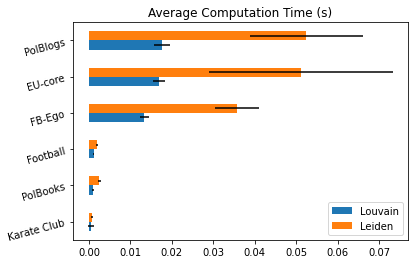

[             Louvain    Leiden
Optic Lobe  0.016341  0.165087,              Louvain    Leiden
Optic Lobe  0.001497  0.043982]
[           Louvain    Leiden
Relativ.  0.037686  3.216448,            Louvain    Leiden
Relativ.  0.003269  0.824907]
[            Louvain    Leiden
Ox. Birds  0.026228  0.294376,             Louvain    Leiden
Ox. Birds  0.001495  0.106107]
[         Louvain     Leiden
HE Th.  0.067264  15.232715,          Louvain   Leiden
HE Th.  0.001346  2.99048]


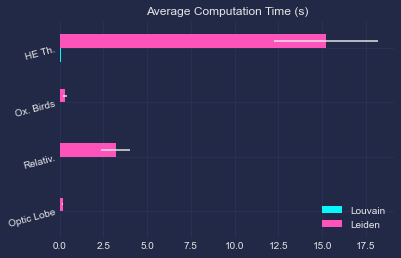

In [ ]:
# For the  first 6 networks (which have Ground-Truth)

## Average computation time

G_Karate_time_sample_averages = generate_sample_time(G_Karate, 100, 'Karate Club')
G_Pol_Books_time_sample_averages = generate_sample_time(G_Pol_Books, 100, 'PolBooks')
G_Football_time_sample_averages = generate_sample_time(G_Football, 100, 'Football')
G_Fb_time_sample_averages = generate_sample_time(G_Fb, 100, 'FB-Ego')
G_Eu_time_sample_averages = generate_sample_time(G_Eu, 100, 'EU-core')
G_Pol_Blogs_time_sample_averages = generate_sample_time(G_Pol_Blogs, 100, 'PolBlogs')

## Generating Plot


all_time_mean_data = pd.concat([G_Karate_time_sample_averages[0],
    G_Pol_Books_time_sample_averages[0],
    G_Football_time_sample_averages[0],
    G_Fb_time_sample_averages[0], 
    G_Eu_time_sample_averages[0],
    G_Pol_Blogs_time_sample_averages[0]]
    )


all_time_std_data = pd.concat([G_Karate_time_sample_averages[1],
    G_Pol_Books_time_sample_averages[1],
    G_Football_time_sample_averages[1],
    G_Fb_time_sample_averages[1], 
    G_Eu_time_sample_averages[1],
    G_Pol_Blogs_time_sample_averages[1]]
    )

all_time_mean_data.plot.barh(rot=15, title="Average Computation Time (s)",
    xerr= all_time_std_data)

plt.legend(loc='lower right')
plt.savefig(fname="Average_Computation_Time_ground_truth.pdf", format="pdf", dpi=2400)
plt.show(block=True)

# For the other 4 networks (which have NO Ground-Truth)

## Average computation time


G_Brain_time_sample_averages = generate_sample_time(G_Brain, 50, 'Optic Lobe')
G_Col_Rel_time_sample_averages = generate_sample_time(G_Col_Rel, 50, 'Relativ.')
G_Birds_time_sample_averages = generate_sample_time(G_Birds, 50, 'Ox. Birds')
G_Col_Theory_time_sample_averages = generate_sample_time(G_Col_Theory, 50, 'HE Th.')

## Generating Figure

all_time_mean_data = pd.concat([G_Brain_time_sample_averages[0], 
    G_Col_Rel_time_sample_averages[0], 
    G_Birds_time_sample_averages[0], 
    G_Col_Theory_time_sample_averages[0]])




all_time_std_data = pd.concat([G_Brain_time_sample_averages[1],
    G_Col_Rel_time_sample_averages[1],
    G_Birds_time_sample_averages[1],
    G_Col_Theory_time_sample_averages[1]]
    )


plt.style.use("cyberpunk")




all_time_mean_data.plot.barh(rot=15, title="Average Computation Time (s)",
    xerr= all_time_std_data)

plt.legend(loc='lower right')
plt.savefig(fname="Average_Computation_Time_NO_ground_truth.pdf", format="pdf", dpi=2400)
plt.show(block=True)


## Generating Instances and Samples for Ground-Truth Networks

### EU Network

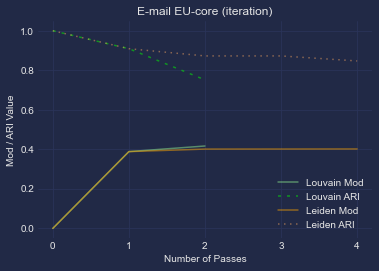

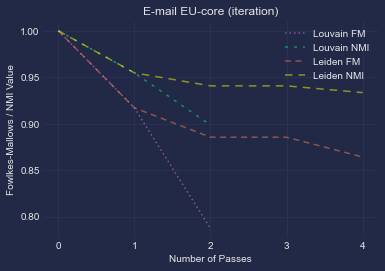

In [30]:
# Generate an instance of Louvain and Leiden

G_Eu_Louvain_partitions_list = louvain(G_Eu)
G_Eu_Leiden_partitions_list = leiden(G_Eu)

# Calculating everything individually 

G_Eu_Louvain_mod = calc_modularity_list(G_Eu_Louvain_partitions_list)
G_Eu_Leiden_mod = calc_modularity_list(G_Eu_Leiden_partitions_list)

G_Eu_Louvain_ARI = calc_ARI_list(G_Eu_Louvain_partitions_list, G_Eu_nx, clustering_label = 'community')
G_Eu_Leiden_ARI = calc_ARI_list(G_Eu_Leiden_partitions_list, G_Eu_nx, clustering_label = 'community')

G_Eu_Louvain_Fowlkes = calc_Fowlkes_list(G_Eu_Louvain_partitions_list, G_Eu_nx, clustering_label="community")
G_Eu_Leiden_Fowlkes = calc_Fowlkes_list(G_Eu_Leiden_partitions_list, G_Eu_nx, clustering_label="community")

G_Eu_Louvain_NMI = calc_NMI_list(G_Eu_Louvain_partitions_list, G_Eu_nx, clustering_label="community")
G_Eu_Leiden_NMI = calc_NMI_list(G_Eu_Leiden_partitions_list, G_Eu_nx, clustering_label="community")

# Plotting Graphs

plot_modularity_ARI('E-mail EU-core (iteration)', G_Eu_Louvain_mod, G_Eu_Leiden_mod, G_Eu_Louvain_ARI, G_Eu_Leiden_ARI)
plot_Fowlkes_NMI('E-mail EU-core (iteration)', G_Eu_Louvain_Fowlkes, G_Eu_Leiden_Fowlkes, G_Eu_Louvain_NMI, G_Eu_Leiden_NMI)

Generated a sample of 100 iterations of Louvain and Leiden
                 Louvain Mean  Louvain Std.  Leiden Mean  Leiden Std.
Modularity           0.412701      0.004327     0.404200     0.004936
ARI                  0.727529      0.042273     0.831037     0.042866
Fowlkes-Mallows      0.769624      0.032254     0.851649     0.034506
NMI                  0.893336      0.010205     0.927511     0.010913
No. of Comms.       26.640000      0.627968    31.890000     1.384583
Avg Comm. Size      37.745804      0.882454    31.573266     1.367669
No. of Passes        2.060000      0.238683     3.560000     1.754187
Time (s)             0.030589      0.001950     0.073138     0.026248


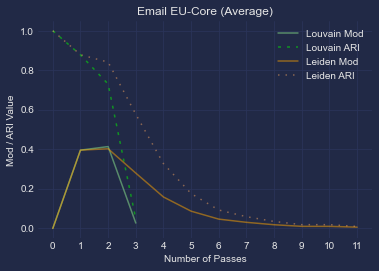

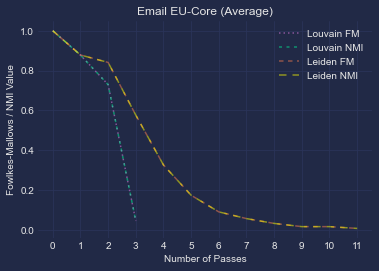

In [31]:
# Generating Sample

G_Eu_sample = generate_sample(100, G_Eu, G_Eu_nx, clustering_label="community")
G_Eu_sample_averages = sample_averages(G_Eu_sample, G_Eu_nx, network_name='EU-core')

# Plotting Graphs

plot_average_modularity_ARI('Email EU-Core (Average)', G_Eu_sample_averages)
plot_average_Fowlkes_NMI('Email EU-Core (Average)', G_Eu_sample_averages)

### PolBlogs Network

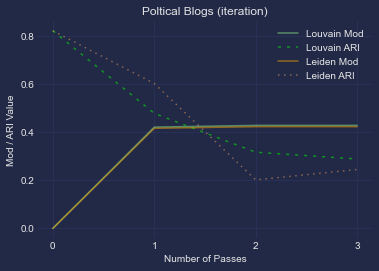

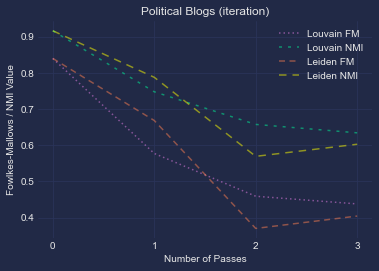

In [32]:

# Generate an instance of Louvain and Leiden

G_Pol_Blogs_Louvain_partitions_list = louvain(G_Pol_Blogs)
G_Pol_Blogs_Leiden_partitions_list = leiden(G_Pol_Blogs)

# Calculating everything individually 

G_Pol_Blogs_Louvain_mod = calc_modularity_list(G_Pol_Blogs_Louvain_partitions_list)
G_Pol_Blogs_Leiden_mod = calc_modularity_list(G_Pol_Blogs_Leiden_partitions_list)

G_Pol_Blogs_Louvain_ARI = calc_ARI_list(G_Pol_Blogs_Louvain_partitions_list, G_Pol_Blogs_nx, clustering_label = 'group')
G_Pol_Blogs_Leiden_ARI = calc_ARI_list(G_Pol_Blogs_Leiden_partitions_list, G_Pol_Blogs_nx, clustering_label = 'group')

G_Pol_Blogs_Louvain_Fowlkes = calc_Fowlkes_list(G_Pol_Blogs_Louvain_partitions_list, G_Pol_Blogs_nx, clustering_label="group")
G_Pol_Blogs_Leiden_Fowlkes = calc_Fowlkes_list(G_Pol_Blogs_Leiden_partitions_list, G_Pol_Blogs_nx, clustering_label="group")

G_Pol_Blogs_Louvain_NMI = calc_NMI_list(G_Pol_Blogs_Louvain_partitions_list, G_Pol_Blogs_nx, clustering_label="group")
G_Pol_Blogs_Leiden_NMI = calc_NMI_list(G_Pol_Blogs_Leiden_partitions_list, G_Pol_Blogs_nx, clustering_label="group")

# Plotting Graphs

plot_modularity_ARI('Poltical Blogs (iteration)', G_Pol_Blogs_Louvain_mod, G_Pol_Blogs_Leiden_mod, G_Pol_Blogs_Louvain_ARI, G_Pol_Blogs_Leiden_ARI)
plot_Fowlkes_NMI('Political Blogs (iteration)', G_Pol_Blogs_Louvain_Fowlkes, G_Pol_Blogs_Leiden_Fowlkes, G_Pol_Blogs_Louvain_NMI, G_Pol_Blogs_Leiden_NMI)

Generated a sample of 100 iterations of Louvain and Leiden
                 Louvain Mean  Louvain Std.  Leiden Mean  Leiden Std.
Modularity           0.426796      0.000274     0.425025     0.004362
ARI                  0.311548      0.030263     0.314043     0.057099
Fowlkes-Mallows      0.456228      0.022942     0.457585     0.043610
NMI                  0.651015      0.019068     0.652831     0.038971
No. of Comms.       10.620000      0.801262    10.800000     1.786594
Avg Comm. Size     115.867954     10.932255   117.134343    24.504588
No. of Passes        2.750000      0.435194     2.390000     0.863339
Time (s)             0.034055      0.002780     0.065628     0.015674


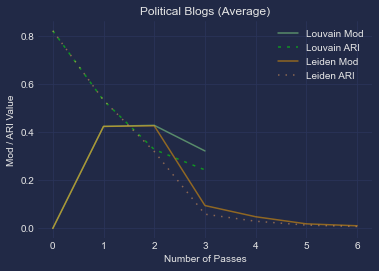

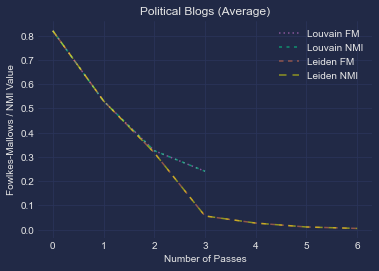

In [33]:
# Generating Sample

G_Pol_Blogs_sample = generate_sample(100, G_Pol_Blogs, G_Pol_Blogs_nx, clustering_label="group")
G_Pol_Blogs_sample_averages = sample_averages(G_Pol_Blogs_sample, G_Pol_Blogs_nx, network_name='PolBlogs')

# Plotting Graphs

plot_average_modularity_ARI('Political Blogs (Average)', G_Pol_Blogs_sample_averages)
plot_average_Fowlkes_NMI('Political Blogs (Average)', G_Pol_Blogs_sample_averages)

### Karate Network

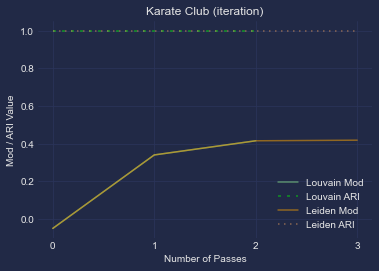

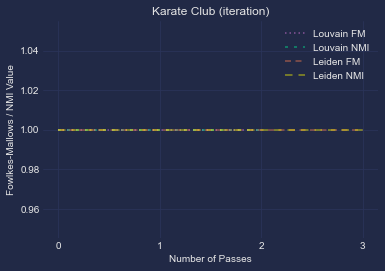

[-0.04980276134122286, 0.3404010519395134, 0.41559829059829057, 0.41880341880341876] [-0.04980276134122286, 0.3404010519395134, 0.41559829059829057]


In [34]:
# Generate an instance of Louvain and Leiden


G_Karate_Louvain_partitions_list = louvain(G_Karate)
G_Karate_Leiden_partitions_list = leiden(G_Karate)

# Calculate everything individually 

G_Karate_Louvain_mod = calc_modularity_list(G_Karate_Louvain_partitions_list)
G_Karate_Leiden_mod = calc_modularity_list(G_Karate_Leiden_partitions_list)

G_Karate_Louvain_ARI = calc_ARI_list(G_Karate_Louvain_partitions_list, G_Karate_nx, clustering_label = 'club')
G_Karate_Leiden_ARI = calc_ARI_list(G_Karate_Leiden_partitions_list, G_Karate_nx, clustering_label = 'club')


G_Karate_Louvain_Fowlkes = calc_Fowlkes_list(G_Karate_Louvain_partitions_list, G_Karate_nx, clustering_label = 'club')
G_Karate_Leiden_Fowlkes = calc_Fowlkes_list(G_Karate_Leiden_partitions_list, G_Karate_nx, clustering_label = 'club')

G_Karate_Louvain_NMI = calc_NMI_list(G_Karate_Louvain_partitions_list, G_Karate_nx, clustering_label = 'club')
G_Karate_Leiden_NMI = calc_NMI_list(G_Karate_Leiden_partitions_list, G_Karate_nx, clustering_label = 'club')

# Plot Graphs


plot_modularity_ARI('Karate Club (iteration)', G_Karate_Louvain_mod, G_Karate_Leiden_mod, G_Karate_Louvain_ARI, G_Karate_Leiden_ARI)
plot_Fowlkes_NMI('Karate Club (iteration)', G_Karate_Louvain_Fowlkes, G_Karate_Leiden_Fowlkes, G_Karate_Louvain_NMI, G_Karate_Leiden_NMI)
 
# Calculating modularity of karate for a caption 

print(G_Karate_Leiden_mod, G_Karate_Louvain_mod)

Generated a sample of 100 iterations of Louvain and Leiden
                 Louvain Mean  Louvain Std.  Leiden Mean  Leiden Std.
Modularity           0.417482      0.002323     0.419721     0.000253
ARI                  1.000000      0.000000     1.000000     0.000000
Fowlkes-Mallows      1.000000      0.000000     1.000000     0.000000
NMI                  1.000000      0.000000     1.000000     0.000000
No. of Comms.        4.000000      0.000000     4.000000     0.000000
Avg Comm. Size       8.500000      0.000000     8.500000     0.000000
No. of Passes        2.000000      0.000000     2.510000     0.502418
Time (s)             0.000583      0.000070     0.000870     0.000161


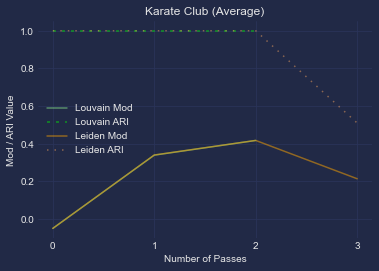

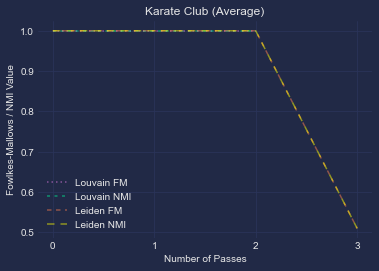

In [35]:
# Generating Sample

G_Karate_sample = generate_sample(100, G_Karate, G_Karate_nx, clustering_label="club")
G_Karate_sample_averages = sample_averages(G_Karate_sample, G_Karate_nx, network_name='Karate')

# Plotting Graphs

plot_average_modularity_ARI('Karate Club (Average)', G_Karate_sample_averages)
plot_average_Fowlkes_NMI('Karate Club (Average)', G_Karate_sample_averages)

### Facebook Network

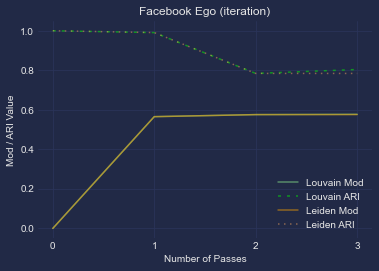

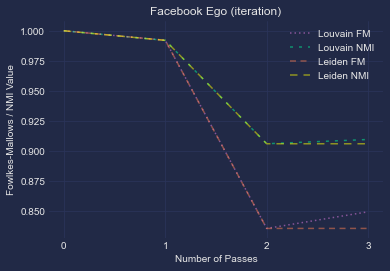

In [36]:
# Generate an instance of Louvain and Leiden


G_Fb_Louvain_partitions_list = louvain(G_Fb)
G_Fb_Leiden_partitions_list = leiden(G_Fb)

# Calculate everything individually

G_Fb_Leiden_mod = calc_modularity_list(G_Fb_Leiden_partitions_list)
G_Fb_Louvain_mod = calc_modularity_list(G_Fb_Louvain_partitions_list)

G_Fb_Louvain_ARI = calc_ARI_list(G_Fb_Louvain_partitions_list, G_Fb_nx, clustering_label = 'group')
G_Fb_Leiden_ARI = calc_ARI_list(G_Fb_Leiden_partitions_list, G_Fb_nx, clustering_label = 'group')

G_Fb_Louvain_Fowlkes = calc_Fowlkes_list(G_Fb_Louvain_partitions_list, G_Fb_nx, clustering_label = 'group')
G_Fb_Leiden_Fowlkes = calc_Fowlkes_list(G_Fb_Leiden_partitions_list, G_Fb_nx, clustering_label = 'group')

G_Fb_Louvain_NMI = calc_NMI_list(G_Fb_Louvain_partitions_list, G_Fb_nx, clustering_label = 'group')
G_Fb_Leiden_NMI = calc_NMI_list(G_Fb_Leiden_partitions_list, G_Fb_nx, clustering_label = 'group')

# Plot Graphs

plot_modularity_ARI('Facebook Ego (iteration)', G_Fb_Louvain_mod, G_Fb_Leiden_mod, G_Fb_Louvain_ARI, G_Fb_Leiden_ARI)
plot_Fowlkes_NMI('Facebook Ego (iteration)', G_Fb_Louvain_Fowlkes, G_Fb_Leiden_Fowlkes, G_Fb_Louvain_NMI, G_Fb_Leiden_NMI)


Generated a sample of 100 iterations of Louvain and Leiden
                 Louvain Mean  Louvain Std.  Leiden Mean  Leiden Std.
Modularity           0.575603      0.002685     0.574468     0.002057
ARI                  0.817894      0.026055     0.835844     0.057259
Fowlkes-Mallows      0.859688      0.018169     0.873365     0.042448
NMI                  0.914160      0.008130     0.926129     0.017649
No. of Comms.       15.840000      0.631177    18.820000     0.701801
Avg Comm. Size      50.078471      1.991309    42.142056     1.605083
No. of Passes        2.900000      0.301511     3.960000     1.644827
Time (s)             0.028993      0.001920     0.057290     0.017205


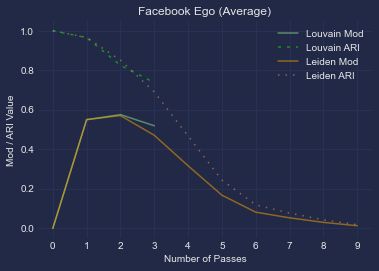

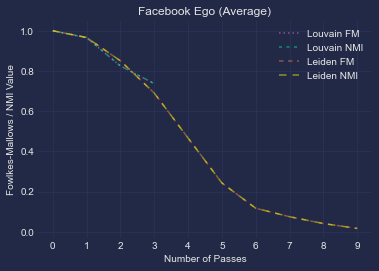

In [37]:
# Generating Sample

G_Fb_sample = generate_sample(100, G_Fb, G_Fb_nx, clustering_label="group")
G_Fb_sample_averages = sample_averages(G_Fb_sample, G_Fb_nx, network_name='FB-Ego')

# Plotting Graphs

plot_average_modularity_ARI('Facebook Ego (Average)', G_Fb_sample_averages)
plot_average_Fowlkes_NMI('Facebook Ego (Average)', G_Fb_sample_averages)

### Football Network

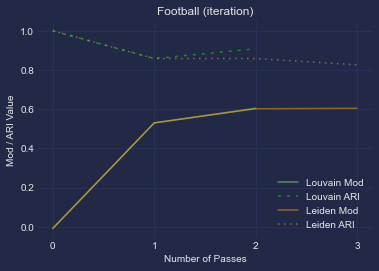

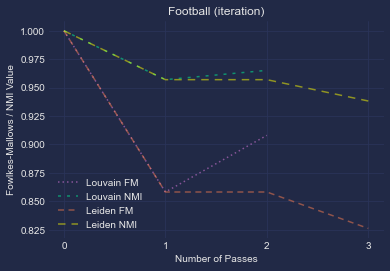

In [38]:
# Generate an instance of Louvain and Leiden


G_Football_Louvain_partitions_list = louvain(G_Football)
G_Football_Leiden_partitions_list = leiden(G_Football)

# Calculating everything individually

G_Football_Leiden_mod = calc_modularity_list(G_Football_Leiden_partitions_list)
G_Football_Louvain_mod = calc_modularity_list(G_Football_Louvain_partitions_list)

G_Football_Louvain_ARI = calc_ARI_list(G_Football_Louvain_partitions_list, G_Football_nx, clustering_label = 'value')
G_Football_Leiden_ARI = calc_ARI_list(G_Football_Leiden_partitions_list, G_Football_nx, clustering_label = 'value')

G_Football_Louvain_Fowlkes = calc_ARI_list(G_Football_Louvain_partitions_list, G_Football_nx, clustering_label = 'value')
G_Football_Leiden_Fowlkes = calc_ARI_list(G_Football_Leiden_partitions_list, G_Football_nx, clustering_label = 'value')


G_Football_Louvain_NMI = calc_NMI_list(G_Football_Louvain_partitions_list, G_Football_nx, clustering_label = 'value')
G_Football_Leiden_NMI = calc_NMI_list(G_Football_Leiden_partitions_list, G_Football_nx, clustering_label = 'value')

# Plotting Graphs

plot_modularity_ARI('Football (iteration)', G_Football_Louvain_mod, G_Football_Leiden_mod, G_Football_Louvain_ARI, G_Football_Leiden_ARI)
plot_Fowlkes_NMI('Football (iteration)', G_Football_Louvain_Fowlkes, G_Football_Leiden_Fowlkes, G_Football_Louvain_NMI, G_Football_Leiden_NMI)

Generated a sample of 100 iterations of Louvain and Leiden
                 Louvain Mean  Louvain Std.  Leiden Mean  Leiden Std.
Modularity           0.602494      0.003355     0.604458     0.000112
ARI                  0.838281      0.044124     0.867871     0.041123
Fowlkes-Mallows      0.863070      0.035365     0.886697     0.033317
NMI                  0.943720      0.012999     0.951945     0.013545
No. of Comms.        9.750000      0.435194    10.000000     0.000000
Avg Comm. Size      11.819444      0.556081    11.500000     0.000000
No. of Passes        2.000000      0.000000     2.000000     0.000000
Time (s)             0.001676      0.000200     0.002375     0.000332


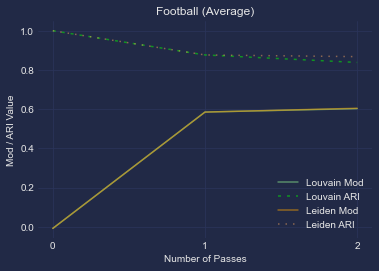

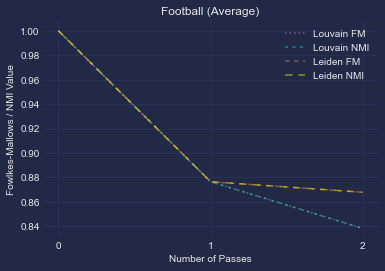

In [39]:
# Generating Sample

G_Football_sample = generate_sample(100, G_Football, G_Football_nx, clustering_label="value")
G_Football_sample_averages = sample_averages(G_Football_sample, G_Football_nx, 'Football')

# Plotting Graphs

plot_average_modularity_ARI('Football (Average)', G_Football_sample_averages)
plot_average_Fowlkes_NMI('Football (Average)', G_Football_sample_averages)

### PolBooks Network

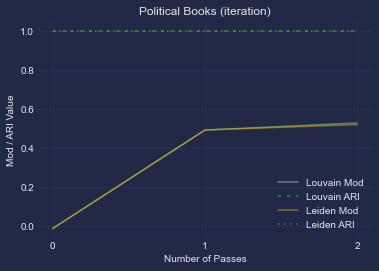

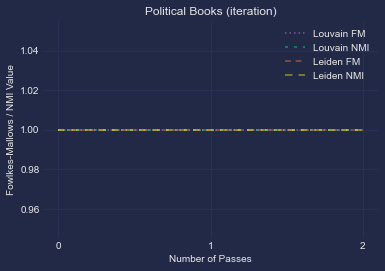

In [40]:
# Generate an instance of Louvain and Leiden


G_Pol_Books_Louvain_partitions_list = louvain(G_Pol_Books)
G_Pol_Books_Leiden_partitions_list = leiden(G_Pol_Books)

# Calculating everything individually

G_Pol_Books_Louvain_mod = calc_modularity_list(G_Pol_Books_Louvain_partitions_list)
G_Pol_Books_Leiden_mod = calc_modularity_list(G_Pol_Books_Leiden_partitions_list)

G_Pol_Books_Louvain_ARI = calc_ARI_list(G_Pol_Books_Louvain_partitions_list, G_Pol_Books_nx, clustering_label = 'value')
G_Pol_Books_Leiden_ARI = calc_ARI_list(G_Pol_Books_Leiden_partitions_list, G_Pol_Books_nx, clustering_label = 'value')


G_Pol_Books_Louvain_Fowlkes = calc_Fowlkes_list(G_Pol_Books_Louvain_partitions_list, G_Pol_Books_nx, clustering_label = 'value')
G_Pol_Books_Leiden_Fowlkes = calc_Fowlkes_list(G_Pol_Books_Leiden_partitions_list, G_Pol_Books_nx, clustering_label = 'value')


G_Pol_Books_Louvain_NMI = calc_NMI_list(G_Pol_Books_Louvain_partitions_list, G_Pol_Books_nx, clustering_label = 'value')
G_Pol_Books_Leiden_NMI = calc_NMI_list(G_Pol_Books_Leiden_partitions_list, G_Pol_Books_nx, clustering_label = 'value')

# Generating Graphs

plot_modularity_ARI('Political Books (iteration)', G_Pol_Books_Louvain_mod, G_Pol_Books_Leiden_mod, G_Pol_Books_Louvain_ARI, G_Pol_Books_Leiden_ARI)
plot_Fowlkes_NMI('Political Books (iteration)', G_Pol_Books_Louvain_Fowlkes, G_Pol_Books_Leiden_Fowlkes, G_Pol_Books_Louvain_NMI, G_Pol_Books_Leiden_NMI)

Generated a sample of 100 iterations of Louvain and Leiden
                 Louvain Mean  Louvain Std.  Leiden Mean  Leiden Std.
Modularity           0.526768      0.000252     0.521501     0.002451
ARI                  1.000000      0.000000     1.000000     0.000000
Fowlkes-Mallows      1.000000      0.000000     1.000000     0.000000
NMI                  1.000000      0.000000     1.000000     0.000000
No. of Comms.        4.870000      0.337998     6.130000     0.337998
Avg Comm. Size      21.682500      1.774488    17.175000     0.844994
No. of Passes        2.000000      0.000000     2.220000     0.416333
Time (s)             0.001355      0.000202     0.002269     0.000375


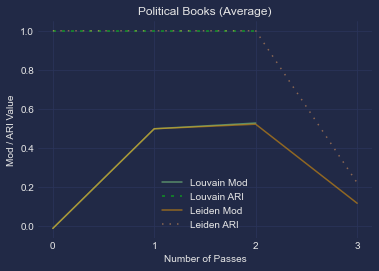

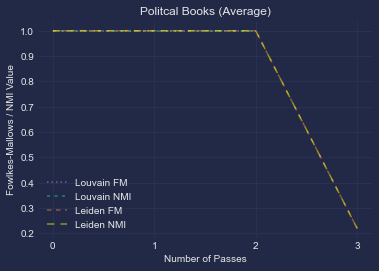

In [41]:
# Generating Sample

G_Pol_Books_sample = generate_sample(100, G_Pol_Books, G_Pol_Books_nx, clustering_label="value")
G_Pol_Books_sample_averages = sample_averages(G_Pol_Books_sample, G_Pol_Books_nx, 'PolBooks')

# Plotting Graphs

plot_average_modularity_ARI('Political Books (Average)', G_Pol_Books_sample_averages)
plot_average_Fowlkes_NMI('Politcal Books (Average)', G_Pol_Books_sample_averages)

## Generating Plot of mean and standard deviation for important measures on each sample

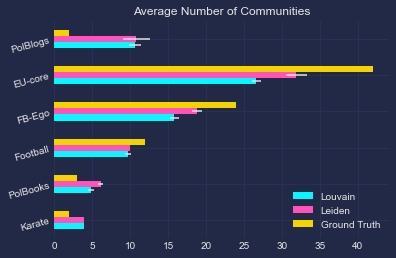

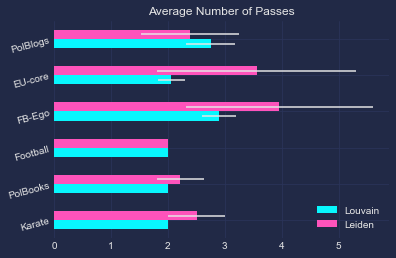

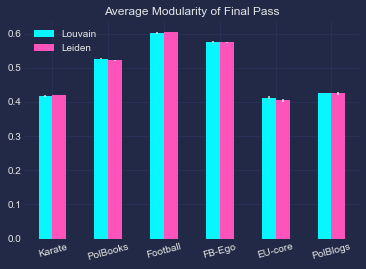

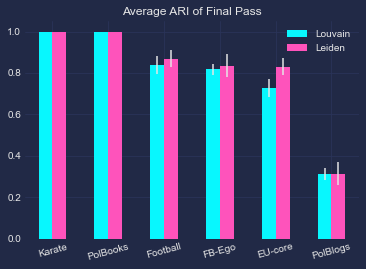

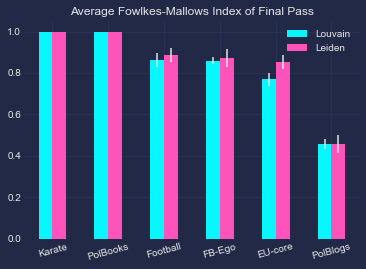

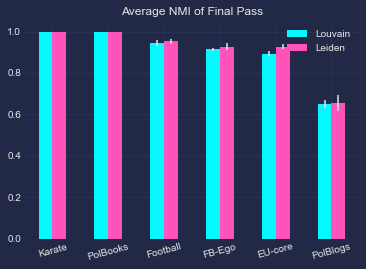

In [42]:
## For the  first 6 networks (which have Ground-Truth)


## Average number of communities

all_time_mean_data = pd.concat([G_Karate_sample_averages[4][0],
    G_Pol_Books_sample_averages[4][0],
    G_Football_sample_averages[4][0],
    G_Fb_sample_averages[4][0], 
    G_Eu_sample_averages[4][0],
    G_Pol_Blogs_sample_averages[4][0]]
    )

all_time_std_data = pd.concat([G_Karate_sample_averages[4][1],
    G_Pol_Books_sample_averages[4][1],
    G_Football_sample_averages[4][1],
    G_Fb_sample_averages[4][1], 
    G_Eu_sample_averages[4][1],
    G_Pol_Blogs_sample_averages[4][1]]
    )

Ground_truth_data = [2,3,12,24,42,2]
all_time_mean_data['Ground Truth'] = Ground_truth_data

all_time_mean_data.plot.barh(rot=15, title="Average Number of Communities",
    xerr= all_time_std_data)

plt.savefig(fname="Average_Number_of_Communities_ground_truth.pdf", format="pdf", dpi=2400)

plt.show(block=True)


## Average number of passes

all_time_mean_data = pd.concat([G_Karate_sample_averages[5][0],
    G_Pol_Books_sample_averages[5][0],
    G_Football_sample_averages[5][0],
    G_Fb_sample_averages[5][0], 
    G_Eu_sample_averages[5][0],
    G_Pol_Blogs_sample_averages[5][0]]
    )

all_time_std_data = pd.concat([G_Karate_sample_averages[5][1],
    G_Pol_Books_sample_averages[5][1],
    G_Football_sample_averages[5][1],
    G_Fb_sample_averages[5][1], 
    G_Eu_sample_averages[5][1],
    G_Pol_Blogs_sample_averages[5][1]]
    )

all_time_mean_data.plot.barh(rot=15, title="Average Number of Passes",
    xerr= all_time_std_data)
    
plt.legend(loc='lower right')
plt.savefig(fname="Average_Number_of_Passes_ground_truth.pdf", format="pdf", dpi=2400)

plt.show(block=True)

## Average Modularity

all_time_mean_data = pd.concat([G_Karate_sample_averages[7][0],
    G_Pol_Books_sample_averages[7][0],
    G_Football_sample_averages[7][0],
    G_Fb_sample_averages[7][0], 
    G_Eu_sample_averages[7][0],
    G_Pol_Blogs_sample_averages[7][0]]
    )


all_time_std_data = pd.concat([G_Karate_sample_averages[7][1],
    G_Pol_Books_sample_averages[7][1],
    G_Football_sample_averages[7][1],
    G_Fb_sample_averages[7][1], 
    G_Eu_sample_averages[7][1],
    G_Pol_Blogs_sample_averages[7][1]]
    )

all_time_mean_data.plot.bar(rot=15, title="Average Modularity of Final Pass",
    yerr= all_time_std_data)

plt.legend(loc='upper left')
plt.savefig(fname="Average_Modularity_ground_truth.pdf", format="pdf", dpi=2400)
plt.show(block=True)


## Average ARI

all_time_mean_data = pd.concat([G_Karate_sample_averages[8][0],
    G_Pol_Books_sample_averages[8][0],
    G_Football_sample_averages[8][0],
    G_Fb_sample_averages[8][0], 
    G_Eu_sample_averages[8][0],
    G_Pol_Blogs_sample_averages[8][0]]
    )


all_time_std_data = pd.concat([G_Karate_sample_averages[8][1],
    G_Pol_Books_sample_averages[8][1],
    G_Football_sample_averages[8][1],
    G_Fb_sample_averages[8][1], 
    G_Eu_sample_averages[8][1],
    G_Pol_Blogs_sample_averages[8][1]]
    )

all_time_mean_data.plot.bar(rot=15, title="Average ARI of Final Pass",
    yerr= all_time_std_data)

plt.savefig(fname="Average_ARI_ground_truth.pdf", format="pdf", dpi=2400)
plt.show(block=True)

## Average Fowlkes

all_time_mean_data = pd.concat([G_Karate_sample_averages[9][0],
    G_Pol_Books_sample_averages[9][0],
    G_Football_sample_averages[9][0],
    G_Fb_sample_averages[9][0], 
    G_Eu_sample_averages[9][0],
    G_Pol_Blogs_sample_averages[9][0]]
    )


all_time_std_data = pd.concat([G_Karate_sample_averages[9][1],
    G_Pol_Books_sample_averages[9][1],
    G_Football_sample_averages[9][1],
    G_Fb_sample_averages[9][1], 
    G_Eu_sample_averages[9][1],
    G_Pol_Blogs_sample_averages[9][1]]
    )

all_time_mean_data.plot.bar(rot=15, title="Average Fowlkes-Mallows Index of Final Pass",
    yerr= all_time_std_data)

plt.savefig(fname="Average_FM_ground_truth.pdf", format="pdf", dpi=2400)
plt.show(block=True)

## Average NMI

all_time_mean_data = pd.concat([G_Karate_sample_averages[10][0],
    G_Pol_Books_sample_averages[10][0],
    G_Football_sample_averages[10][0],
    G_Fb_sample_averages[10][0], 
    G_Eu_sample_averages[10][0],
    G_Pol_Blogs_sample_averages[10][0]]
    )


all_time_std_data = pd.concat([G_Karate_sample_averages[10][1],
    G_Pol_Books_sample_averages[10][1],
    G_Football_sample_averages[10][1],
    G_Fb_sample_averages[10][1], 
    G_Eu_sample_averages[10][1],
    G_Pol_Blogs_sample_averages[10][1]]
    )

all_time_mean_data.plot.bar(rot=15, title="Average NMI of Final Pass",
    yerr= all_time_std_data)

plt.savefig(fname="Average_NMI_ground_truth.pdf", format="pdf", dpi=2400)
plt.show(block=True)

## Samples for Networks with NO Ground-Truth

Generated a sample of 5 iterations of Louvain and Leiden. No Ground-Truth.
                Louvain Mean  Louvain Std.  Leiden Mean  Leiden Std.
Modularity          0.861516      0.000229     0.825872     0.003500
No. of Comms.     392.800000      1.303840   575.800000    10.894953
Avg Comm. Size     13.345332      0.044346     9.106466     0.172498
No. of Passes       4.000000      0.000000    16.600000     5.899152
Time (s)            0.056395      0.001610     2.601941     0.899323


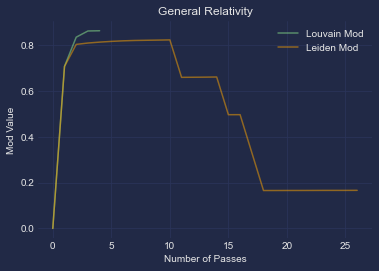

Generated a sample of 5 iterations of Louvain and Leiden. No Ground-Truth.
                Louvain Mean  Louvain Std.  Leiden Mean  Leiden Std.
Modularity          0.296896      0.001124     0.297968     0.001802
No. of Comms.      21.600000      1.341641    21.000000     2.449490
Avg Comm. Size    187.896429     10.773056   194.661714    20.945233
No. of Passes       2.200000      0.447214     3.800000     1.095445
Time (s)            0.039445      0.003005     0.341302     0.091622


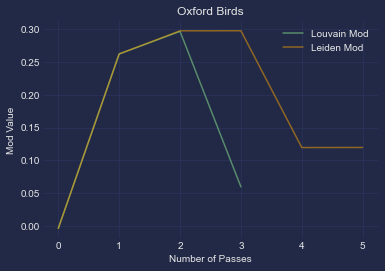

Generated a sample of 5 iterations of Louvain and Leiden. No Ground-Truth.
                Louvain Mean  Louvain Std.  Leiden Mean  Leiden Std.
Modularity          0.422993      0.000000     0.422775     0.000000
No. of Comms.      14.000000      0.000000    15.000000     0.000000
Avg Comm. Size    127.214286      0.000000   118.733333     0.000000
No. of Passes       3.000000      0.000000     5.000000     0.000000
Time (s)            0.024932      0.004825     0.134345     0.002521


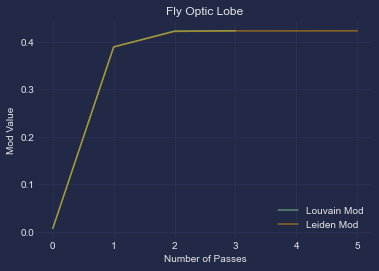

Generated a sample of 5 iterations of Louvain and Leiden. No Ground-Truth.
                Louvain Mean  Louvain Std.  Leiden Mean  Leiden Std.
Modularity          0.768793      0.001658     0.731729     0.002909
No. of Comms.     477.000000      2.549510   793.600000    11.081516
Avg Comm. Size     20.706972      0.110678    12.447755     0.173567
No. of Passes       4.000000      0.000000    27.600000     4.929503
Time (s)            0.112081      0.003448    15.095981     2.968159


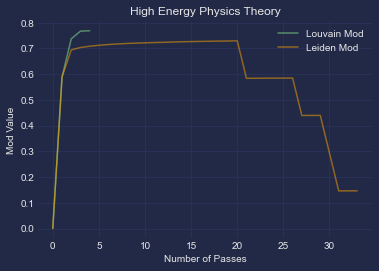

In [32]:
## Generating samples for 4 networks without ground truth

## So I had to play around with a bunch of settings to even get this cell of code to work with 50 iterations and not result in kernel error.
# Here, they are only for 5 iterations, but it was 50 iterations for the project. Please feel free to test out the code yourself.

# Relativity Collab network


G_Col_Rel_sample =  generate_sample_no_ground_truth(5, G_Col_Rel, G_Col_Rel_nx)
G_Col_Rel_sample_averages = sample_averages_no_ground_truth(G_Col_Rel_sample, G_Col_Rel_nx, network_name = "Relativ.")
plot_average_modularity('General Relativity', G_Col_Rel_sample_averages)

# Oxford Birds

G_Birds_sample =  generate_sample_no_ground_truth(5, G_Birds, G_Birds_nx)
G_Birds_sample_averages = sample_averages_no_ground_truth(G_Birds_sample, G_Birds_nx, network_name = "Ox. Birds")
plot_average_modularity('Oxford Birds', G_Birds_sample_averages)


# Fly Optical Lobe

G_Brain_sample =  generate_sample_no_ground_truth(5, G_Brain, G_Brain_nx)
G_Brain_sample_averages = sample_averages_no_ground_truth(G_Brain_sample, G_Brain_nx, network_name = "Optic Lobe")
plot_average_modularity('Fly Optic Lobe', G_Brain_sample_averages)

# High Energy Theory 

G_Col_Theory_sample =  generate_sample_no_ground_truth(5, G_Col_Theory, G_Col_Theory_nx)
G_Col_Theory_sample_averages = sample_averages_no_ground_truth(G_Col_Theory_sample, G_Col_Theory_nx, network_name = "HE Th.")
plot_average_modularity('High Energy Physics Theory', G_Col_Theory_sample_averages)


# For additional collab network didn't make it into final analysis due to the fact my kernel crashes everytime I run because my computer is not powerful enough.


# G_Col_Cond_sample =  generate_sample_no_ground_truth(3, G_Col_Cond, G_Col_Cond_nx)
# G_Col_Cond_sample_averages = sample_averages_no_ground_truth(G_Col_Cond_sample, G_Col_Cond_nx, network_name = "Cond. M.")
# plot_average_modularity('Condense Matter', G_Col_Cond_sample_averages)

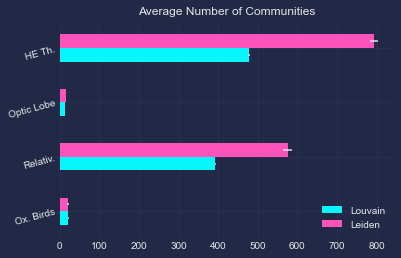

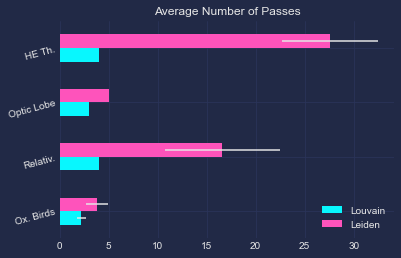

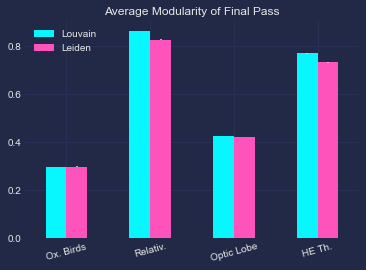

In [33]:
## For the 4 networks (which have NO Ground-Truth)

## Average number of communities

all_time_mean_data = pd.concat([G_Birds_sample_averages[4][0],
    G_Col_Rel_sample_averages[4][0],
    G_Brain_sample_averages[4][0],
    G_Col_Theory_sample_averages[4][0]]
    )

all_time_std_data = pd.concat([G_Birds_sample_averages[4][1],
    G_Col_Rel_sample_averages[4][1],
    G_Brain_sample_averages[4][1],
    G_Col_Theory_sample_averages[4][1]]
    )

all_time_mean_data.plot.barh(rot=15, title="Average Number of Communities",
    xerr= all_time_std_data)

plt.savefig(fname="Average_Number_of_Communities_NO_ground_truth.pdf", format="pdf", dpi=2400)

plt.show(block=True)


## Average number of passes

all_time_mean_data = pd.concat([G_Birds_sample_averages[5][0],
    G_Col_Rel_sample_averages[5][0],
    G_Brain_sample_averages[5][0],
    G_Col_Theory_sample_averages[5][0]]
    )

all_time_std_data = pd.concat([G_Birds_sample_averages[5][1],
    G_Col_Rel_sample_averages[5][1],
    G_Brain_sample_averages[5][1],
    G_Col_Theory_sample_averages[5][1]]
    )

all_time_mean_data.plot.barh(rot=15, title="Average Number of Passes",
    xerr= all_time_std_data)

plt.savefig(fname="Average_Number_of_Passes_NO_ground_truth.pdf", format="pdf", dpi=2400)

plt.show(block=True)

## Average Modularity

all_time_mean_data = pd.concat([G_Birds_sample_averages[7][0],
    G_Col_Rel_sample_averages[7][0],
    G_Brain_sample_averages[7][0],
    G_Col_Theory_sample_averages[7][0]]
    )


all_time_std_data = pd.concat([G_Birds_sample_averages[7][1],
    G_Col_Rel_sample_averages[7][1],
    G_Brain_sample_averages[7][1],
    G_Col_Theory_sample_averages[7][1]]
    )

all_time_mean_data.plot.bar(rot=15, title="Average Modularity of Final Pass",
    yerr= all_time_std_data)

plt.savefig(fname="Average_Modularity_NO_ground_truth.pdf", format="pdf", dpi=2400)
plt.show(block=True)

## Generating partition visualisations

In [34]:
# Fly Optic Brain

S = [G_Brain_nx.subgraph(c).copy() for c in nx.connected_components(G_Brain_nx)]
G_Brain_GCC = ig.Graph.from_networkx(S[0])
G_Brain_GCC_Louvain_partitions_list = louvain(G_Brain_GCC)
ig.plot(G_Brain_GCC_Louvain_partitions_list[-1],
vertex_size = 10
        )

In [36]:
# Oxford Birds

G_Birds_Louvain_partitions_list = louvain(G_Birds)
G_Birds_node_degrees = [val for (node, val) in G_Birds_nx.degree()]
ig.plot(G_Birds_Louvain_partitions_list[-1],
vertex_size = 6*np.log(G_Birds_node_degrees),
bbox=(0, 0, 1200, 1600),
        )

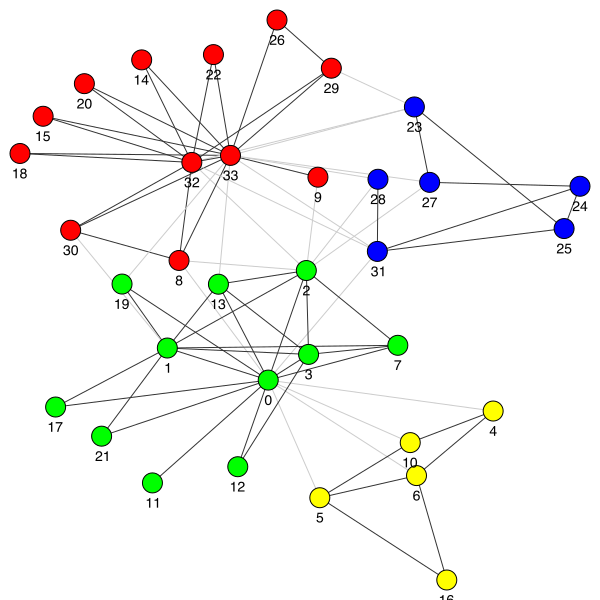

In [40]:
## Use to visualise different partitions of karate club graph by Louvain or Leiden
# The networks look quite 'cute' with this bbox setting, remove it for the figures generated in the project 
# You can also remove the node labels with the vertex_label_size argument = 0

G_Karate_Louvain_partitions_list = louvain(G_Karate)
ig.plot(G_Karate_Louvain_partitions_list[-1],
        vertex_label_dist = 1.5,
        )
# ig.plot(G_Karate_Louvain_partitions_list[2],
#         vertex_label_dist = 1.5,
#         bbox=(0,0,250,250)
#         )

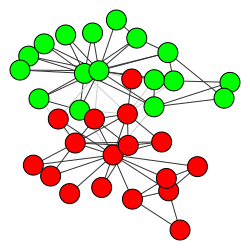

In [41]:
## Constant Potts model recovers ground-truth
G_Karate_Original = ig.Graph.Famous('Zachary')
karate_partition = la.find_partition(G_Karate_Original, la.CPMVertexPartition, resolution_parameter = 0.05)
ig.plot(karate_partition, vertex_label_dist = 1.5, bbox=(0,0,250,250))

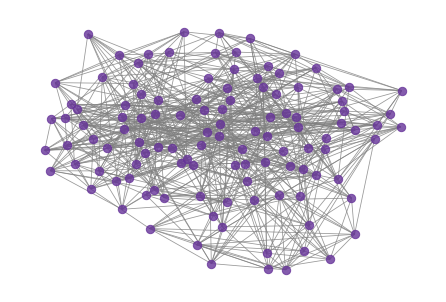

In [42]:
# Naive visualisation of the Football network

nx.draw(G_Football_nx, node_size=70, alpha=0.8, width=0.8, edge_color='gray', node_color='rebeccapurple')
plt.savefig('Football_naive.pdf', dpi=1600)

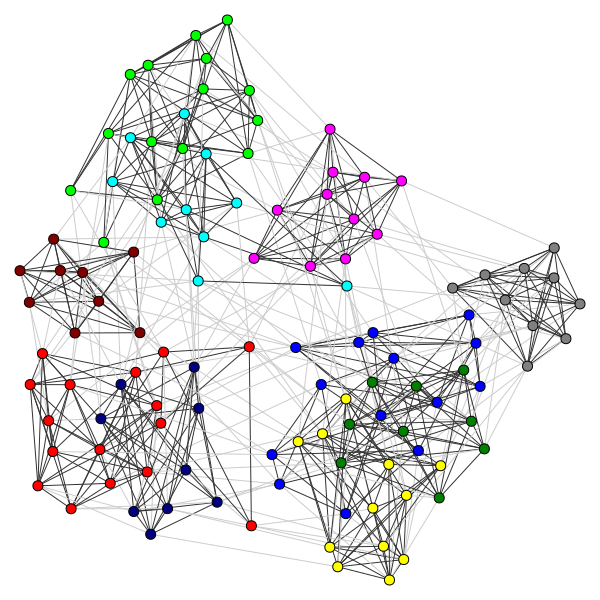

In [44]:
# Visualisation of a Louvain partition of the Football network
G_Football_Louvain_partitions_list = louvain(G_Football)
ig.plot(G_Football_Louvain_partitions_list[-1],
        vertex_label_dist = 1.5,
        vertex_label_size = 0,
        vertex_size = 10
        )